# Day09 Basic Data Visualizations with Pandas 2/2 
# Pandas視覺化資料基礎 2/2


In [1]:
# 載入所需套件 import packages
import pandas as pd
import numpy as np

## 圓餅圖 Pie Plot

圓餅圖適合用來描述百分比之間的相對關係。繪製圓餅圖可以使用DataFrame.plot.pie()或Series.plot.pie()。<br>
Pie plots are good at showing the relationship of parts out of a whole. Use DataFrame.plot.pie() or Series.plot.pie() to plot pie plots.


In [2]:
# 創造隨機數據 create some random data
df = pd.DataFrame(3 * np.random.rand(4, 2), 
                  index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000233C04BF630>,
      dtype=object)

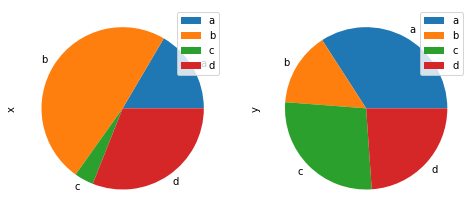

In [4]:
# 繪圖 plot
df.plot.pie(subplots=True, figsize=(8, 4))

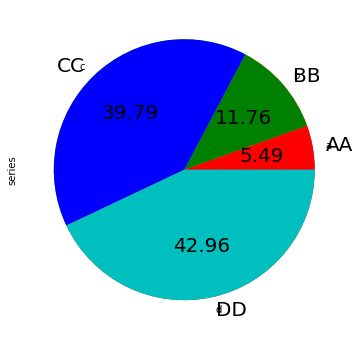

In [5]:
series = pd.Series(3 * np.random.rand(4), 
                   index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'], 
                autopct='%.2f', fontsize=20, figsize=(6, 6))

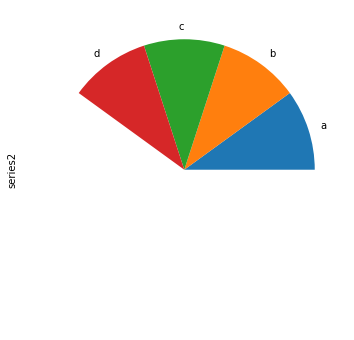

In [6]:
# 若是繪製資料總和小於1，會畫出扇形。
# If you pass values whose sum total is less than 1.0, matplotlib draws a semicircle.

series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))

## 區域圖 Area Plot

區域圖透過面積來顯示統計數據，呈現隨時間的各個累計總數。繪製區域圖用Series.plot.area()或DataFrame.plot.area()，預設為繪製堆疊的區域圖，注意數值須同號。<br>
Area plots show the cumulated totals value. Use Series.plot.area() or DataFrame.plot.area() to plot area plots. Default as stacked, in this case the data need to be all positive or all negative.

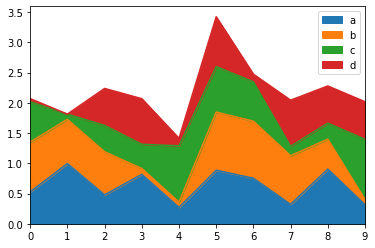

In [7]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

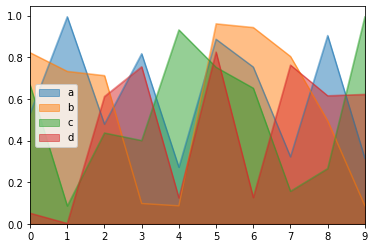

In [8]:
df.plot.area(stacked=False);

 ## 六角形箱體圖 Hexagonal Bin Plot
 
六角形箱體圖結合散點圖與熱力圖的特點，解決散點圖不好解讀重疊點密度的問題。參數gridsize指定x軸的六角總數，預設為100。<br>
Hexagonal bin plot combines the traits of scatter plot and heatmap. The keyword gridsize controls the number of hexagons in the x-direction, and defaults to 100.

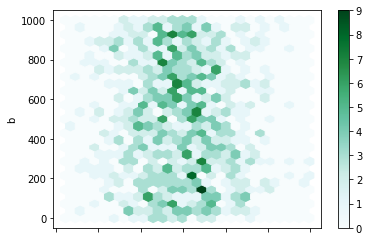

In [9]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

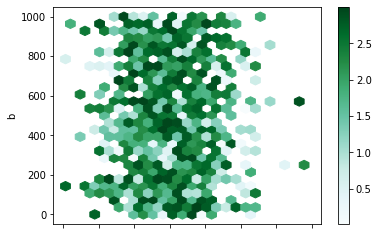

In [10]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

## 平行座標圖 Parallel coordinates

平行座標圖適合用來畫具有多變量的資料，觀察變量的群聚狀況。繪製有名的鳶尾花資料集作為範例。<br>
Parallel coordinates is a plotting technique for plotting multivariate data. Parallel coordinates allows one to see clusters in data. The example plots out the famous iris dataset.



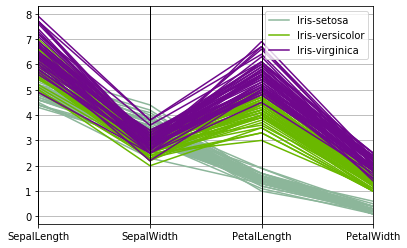

In [11]:
from pandas.plotting import parallel_coordinates # 載入繪製平行座標圖的模組 import the Parallel coordinates module
import matplotlib.pyplot as plt
data = pd.read_csv('data/iris.data') # 使用鳶尾花數據集 read in the iris dataset
plt.figure()
parallel_coordinates(data, 'Name')

## 相關圖 Autocorrelation Plot

相關圖用來檢查數據集的隨機性，通過計算在不同時間滯後的數據值的自相關取得該隨機性。<br>
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. 

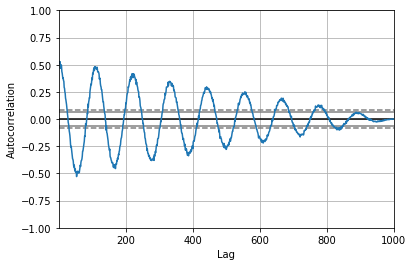

In [12]:
from pandas.plotting import autocorrelation_plot  # 載入繪製相關圖的模組 import the Autocorrelation Plot module
plt.figure()
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
autocorrelation_plot(data)

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] 第二屆機器學習百日馬拉松內容

[2] [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[3] [給工程師的統計學及資料分析](https://www.slideshare.net/tw_dsconf/123-70852901?next_slideshow=1)

[4] [Parallel coordinates](https://en.wikipedia.org/wiki/Parallel_coordinates)
